In [1]:
## IMPORTANDO BIBLIOTECAS

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import lines
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.pylab import rcParams
from datetime import datetime
rcParams['figure.figsize'] = 10, 6

In [2]:
## LENDO O DATASET ,parse_dates=['Date'], index_col='Date'
base = pd.read_csv('treino30.csv',parse_dates=['Date'], index_col='Date')

In [3]:
## OBSERVANDO O CABEÇALHO
base.head()

,Id,Province_State,Country_Region,ConfirmedCases,Fatalities
Date,,,,,
2020-01-22,1,NaN,Afghanistan,0.0,0.0
2020-01-23,2,NaN,Afghanistan,0.0,0.0
2020-01-24,3,NaN,Afghanistan,0.0,0.0
2020-01-25,4,NaN,Afghanistan,0.0,0.0
2020-01-26,5,NaN,Afghanistan,0.0,0.0


In [11]:
## FILTRANDO DADOS DO BRASIL
Brazil = base.loc[(base['Country_Region'] == 'Brazil'), ['Date','ConfirmedCases','Fatalities']]

## CASOS CONFIRMADOS
CasosConfirmados = base.loc[(base['Country_Region'] == 'Brazil'), ['ConfirmedCases']]

## MORTES CONFIRMADAS
MortesConfirmadas = base.loc[(base['Country_Region'] == 'Brazil'), ['Fatalities']]

## MORTES MAIOR QUE 30
MortesMaior = MortesConfirmadas[MortesConfirmadas['Fatalities'] > 30 ]

## ALOCANDO SOMENTE OS CASOS MAIOR QUE 0 
CasosConfirmadosOk = CasosConfirmados[CasosConfirmados['ConfirmedCases'] > 100]

## ALOCANDO CASOS CONFIRMADOS > 0
CasosConfirmadosMaior = CasosConfirmados[CasosConfirmados['ConfirmedCases'] > 0]



C:\Users\mat-p\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,ConfirmedCases
Date,
2020-03-13,151.0
2020-03-14,151.0
2020-03-15,162.0
2020-03-16,200.0
2020-03-17,321.0
2020-03-18,372.0
2020-03-19,621.0
2020-03-20,793.0
2020-03-21,1021.0


In [5]:
## VENDO OS TIPOS DAS VARIVEIS
print(base.dtypes)

Id                  int64
Province_State     object
Country_Region     object
ConfirmedCases    float64
Fatalities        float64
dtype: object


Text(0.5, 0, 'Datas')

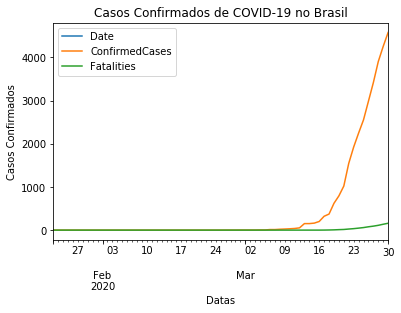

In [13]:
## OBSERVANDO CURVA DE TENDÊNCIA DO BRAZIL (COVID-19) E MORTES

Brazil.plot()

plt.title("Casos Confirmados de COVID-19 no Brasil")
plt.ylabel("Casos Confirmados")
plt.xlabel("Datas")

#plt.savefig("CurvaDeTendencia.png", dpi = 300)


In [14]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [15]:
## PREVENDO PELO HOLT WINTERS PELO METODO ADITIVO
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

fit1 = ExponentialSmoothing(CasosConfirmadosOk, seasonal_periods=5, trend='additive', seasonal='additive').fit(use_boxcox=True)

C:\Users\mat-p\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\mat-p\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\mat-p\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\mat-p\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


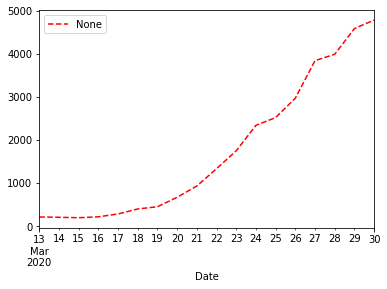

In [16]:
fit1.fittedvalues.plot(style='--', color='red', legend= True)
fcast2 = fit1.fittedvalues.rename("Dados Confirmados até dia 30/03/2020")

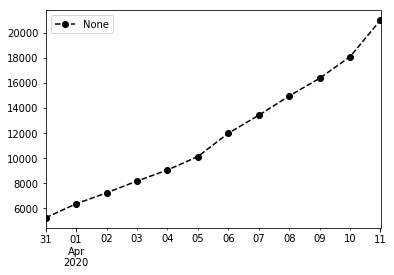

In [17]:
fit1.forecast(12).plot(style='--', marker='o', color='black', legend=True)
fcast1 = fit1.forecast(7).rename("Previsão")

2020-03-31     5264.236351
2020-04-01     6372.062431
2020-04-02     7242.300631
2020-04-03     8182.605778
2020-04-04     9060.261473
2020-04-05    10132.658168
2020-04-06    11984.766545
Freq: D, Name: Previsão, dtype: float64


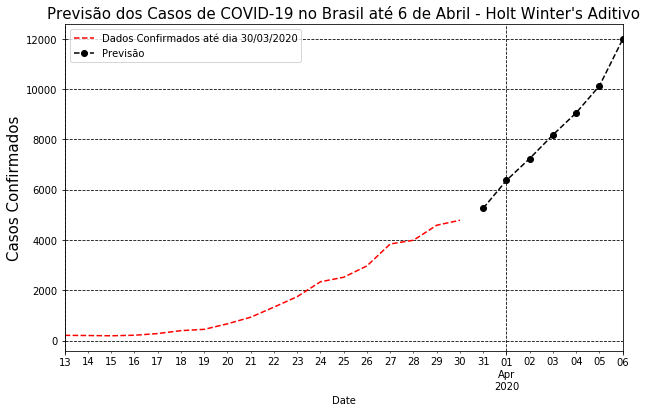

In [26]:
plt.title("Previsão dos Casos de COVID-19 no Brasil até 6 de Abril - Holt Winter's Aditivo", fontsize = 15)
plt.ylabel("Casos Confirmados", fontsize = 15)
plt.xlabel("Datas")

fcast2.plot(style='--', color='red', legend=True)
plt.grid(True)

fcast1.plot(style='--', marker='o', color='black', legend=True)
plt.grid(True)

plt.rc('grid', linestyle='dashed', color='black')


print(fcast1)

#plt.savefig("HoltWintersAditivoCNMAC.png", dpi = 300, bbox_inches='tight')